In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Função de remoção de outliers

In [102]:
def outliers_indexes(df, ft):
    """ 
    Função que retorna o índice dos outliers
    Embasamento matemático:
    Amplitude Interquartil => IQR = Quartil_3 - Quartil_1
    Limite Inferior => LI = Quartil_1 - 1.5*IQR
    Limite Superior => LS = Quartil_3 + 1.5*IQR
    Todos os dados que estiverem acima do limite superior ou abaixo do limite inferior, são outliers
    """
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    LI = Q1 - 1.5*IQR
    LS = Q3 + 1.5*IQR
    
    lista_indices = df.index[ (df[ft] < LI) | (df[ft] > LS) ]
    
    return lista_indices


# Cria-se uma lista vazia para armazenar os índices de saídas de múltiplas colunas 
# (somente caso se quisesse tirar outliers de multiplas colunas)

def outliers_index_l(df):
    index_list = []
    for feature in ["Preço", "TotalReviews"]:
        index_list.extend(outliers_indexes(df, feature))
    outliers_index_list = outliers_indexes(df, 'Preço')
    print("Quantidade de outliers: ",len(outliers_index_list))
    
    return outliers_index_list
    
    
def remove_outliers(df, index_list):
    index_list = sorted(set(index_list))
    # Drop dos outliers
    df = df.drop(index_list)
    return df

# Dados amazon

In [103]:
dados_amazon = pd.read_csv('amazon/output/dados_amazon.csv')
dados_amazon_new = pd.read_csv('amazon/output/dados_amazon.csv').drop(columns=['Estrelas','Url'])

# Dados Americanas

In [104]:
dados_americanas = pd.read_csv('americanas/output/dados_completos_americanas.csv',sep=';')
dados_americanas_new = dados_americanas.drop(columns=['Modelo','Url'])
dados_americanas_new

,Descrição,TotalReviews,Preço,Loja,Categoria
0,Notebook Lenovo Ultrafino Ideapad 3i Intel Cor...,54,3562.49,Americanas,Notebook
1,Notebook Samsung Book Intel Celeron-6305 4GB 5...,90,2098.70,Americanas,Notebook
2,Notebook Lenovo Ultrafino Ideapad S145 AMD Ryz...,7,2952.57,Americanas,Notebook
3,Notebook Samsung Book Intel Core i5-1135G7 8GB...,0,3544.81,Americanas,Notebook
4,Notebook Positivo Motion Q464C Intel Atom Z835...,73,1424.99,Americanas,Notebook
...,...,...,...,...,...
933,Refrigerador Ngv 10 Azul,0,1699.00,Americanas,Geladeira
934,Refrigerador Panasonic BT40 387L 2 Portas Bran...,0,2751.14,Americanas,Geladeira
935,Refrigerador Consul CRA30F com Degelo Seco e G...,0,1529.00,Americanas,Geladeira
936,Refrigerador Brastemp Inverse 419L 3 Portas Fr...,0,6449.14,Americanas,Geladeira


# Dados Casas Bahia

In [105]:
dados_casas_bahia = pd.read_csv('casas_bahia/output/dados_casas_bahia.csv',sep=';')
dados_casas_bahia_new = dados_casas_bahia.drop(columns=['Estrelas'])
dados_casas_bahia_new

,Descrição,TotalReviews,Preço,Loja,Categoria
0,Notebook Acer Core i5-10210U 8GB 512GB SSD Tel...,297,3999.00,Casas Bahia,Notebook
1,Notebook Samsung Dual Core 4GB 500GB Tela Full...,251,2349.00,Casas Bahia,Notebook
2,Notebook Positivo Intel Atom Quad Core 4GB 64G...,468,1519.90,Casas Bahia,Notebook
3,Notebook 2 em 1 Positivo Dual Core 4GB 64GB eM...,360,1699.00,Casas Bahia,Notebook
4,Notebook Samsung Core i3-1115G4 4GB 1TB Tela F...,272,3099.00,Casas Bahia,Notebook
...,...,...,...,...,...
1046,Refrigerador Samsung Inverter Frost Free RT53K...,4,3639.00,Casas Bahia,Geladeira
1047,Geladeira Philco Frost Free French Door 3 Port...,0,2999.00,Casas Bahia,Geladeira
1048,Geladeira Electrolux Automático Duplex 2 Porta...,0,2793.80,Casas Bahia,Geladeira
1049,Geladeira Electrolux Bottom Freezer 2 Portas F...,1,5673.79,Casas Bahia,Geladeira


In [106]:
outliers_index_list_cb = outliers_index_l(dados_casas_bahia_new)
df_clean_cb = remove_outliers(dados_casas_bahia_new, outliers_index_list_cb)

Quantidade de outliers:  55


# Dados Magazine Luiz

In [107]:
dados_ml = pd.read_csv('magazine_luiza/output/dados_magazine_luiza.csv',sep=';')
dados_ml_new = dados_ml.drop(columns=['Estrelas','URL'])

# Dataframe Geral

In [108]:
dados_gerais = pd.concat([dados_amazon_new, dados_americanas_new,df_clean_cb,dados_ml_new])
dados_gerais.reset_index(drop=True, inplace=True)
dados_gerais

,Descrição,Preço,TotalReviews,Loja,Categoria
0,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,199.0,Amazon,Notebook
1,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,26.0,Amazon,Notebook
2,SAMSUNG Chromebook SS 11.6 Intel DC 4GB 32GB X...,1699.00,239.0,Amazon,Notebook
3,"Samsung BookIntel® Core™ i3-1115G4, 11 Geração...",2789.09,46.0,Amazon,Notebook
4,Notebook Positivo Motion Q464C Intel® Atom® Qu...,1718.90,72.0,Amazon,Notebook
...,...,...,...,...,...
3986,Geladeira/Refrigerador Samsung Frost Free,3324.05,0.0,Megazine Luiza,Geladeira
3987,Geladeira Brastemp Frost Free Duplex 500 litro...,5571.00,0.0,Megazine Luiza,Geladeira
3988,Geladeira Frost Free Midea MD-RT453FGA041 425L...,2951.10,0.0,Megazine Luiza,Geladeira
3989,Geladeira panasonic bb53 branca 425l 127v,3199.45,0.0,Megazine Luiza,Geladeira


In [109]:
dados_gerais_marcas = dados_gerais.copy()
dados_gerais_marcas

,Descrição,Preço,TotalReviews,Loja,Categoria
0,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,199.0,Amazon,Notebook
1,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,26.0,Amazon,Notebook
2,SAMSUNG Chromebook SS 11.6 Intel DC 4GB 32GB X...,1699.00,239.0,Amazon,Notebook
3,"Samsung BookIntel® Core™ i3-1115G4, 11 Geração...",2789.09,46.0,Amazon,Notebook
4,Notebook Positivo Motion Q464C Intel® Atom® Qu...,1718.90,72.0,Amazon,Notebook
...,...,...,...,...,...
3986,Geladeira/Refrigerador Samsung Frost Free,3324.05,0.0,Megazine Luiza,Geladeira
3987,Geladeira Brastemp Frost Free Duplex 500 litro...,5571.00,0.0,Megazine Luiza,Geladeira
3988,Geladeira Frost Free Midea MD-RT453FGA041 425L...,2951.10,0.0,Megazine Luiza,Geladeira
3989,Geladeira panasonic bb53 branca 425l 127v,3199.45,0.0,Megazine Luiza,Geladeira


In [110]:
modelos = ["lenovo", "positivo", "samsung", "dell", "acer", "apple", "xiaomi", "motorola", "asus","sony","tcl","philips","lg","philco" ]
count = 0
dados_gerais_marcas["Marca"] = np.NaN

for index, row in dados_gerais_marcas.iterrows():
    for modelo in modelos:
        if modelo in row["Descrição"].lower():
            dados_gerais_marcas.loc[index, "Marca"] = modelo.capitalize()

In [111]:
dados_gerais_marcas.dropna(inplace=True)
dados_gerais_marcas.reset_index(drop=True, inplace=True)
dados_gerais_marcas

,Descrição,Preço,TotalReviews,Loja,Categoria,Marca
0,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,199.0,Amazon,Notebook,Lenovo
1,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,26.0,Amazon,Notebook,Lenovo
2,SAMSUNG Chromebook SS 11.6 Intel DC 4GB 32GB X...,1699.00,239.0,Amazon,Notebook,Samsung
3,"Samsung BookIntel® Core™ i3-1115G4, 11 Geração...",2789.09,46.0,Amazon,Notebook,Samsung
4,Notebook Positivo Motion Q464C Intel® Atom® Qu...,1718.90,72.0,Amazon,Notebook,Positivo
...,...,...,...,...,...,...
2547,Geladeira/Refrigerador Inverter 554 Litros Phi...,5264.86,0.0,Megazine Luiza,Geladeira,Philco
2548,Geladeira French Door Eco Inverter Philco Fros...,3952.93,0.0,Megazine Luiza,Geladeira,Philco
2549,Geladeira/Refrigerador Philco Frost Free,7884.05,2.0,Megazine Luiza,Geladeira,Philco
2550,Geladeira/Refrigerador Smart LG Side by Side,17669.05,0.0,Megazine Luiza,Geladeira,Lg


D:\Programas\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

D:\Programas\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

D:\Programas\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



<Figure size 1152x648 with 0 Axes>

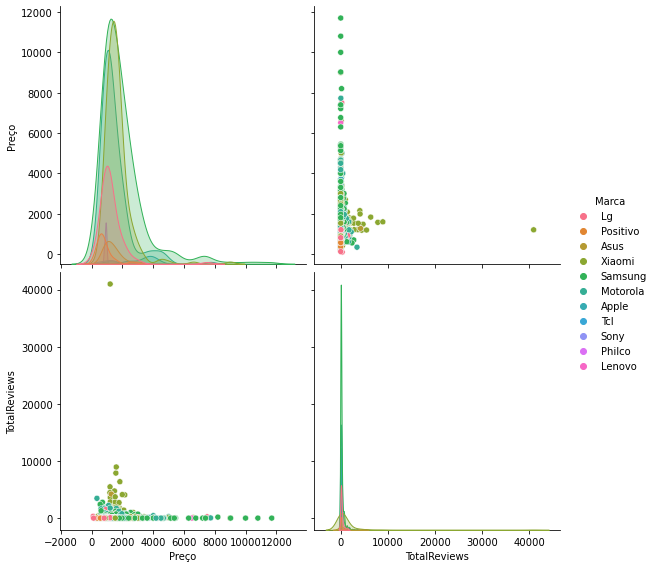

In [121]:
fig = plt.figure(figsize=(16,9))
sns.pairplot(data=dados_gerais_marcas.query("Categoria == 'Smartphone'"), hue="Marca",height=4);

In [77]:
dados_gerais

,Descrição,Preço,TotalReviews,Loja,Categoria
0,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,199.0,Amazon,Notebook
1,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,26.0,Amazon,Notebook
2,SAMSUNG Chromebook SS 11.6 Intel DC 4GB 32GB X...,1699.00,239.0,Amazon,Notebook
3,"Samsung BookIntel® Core™ i3-1115G4, 11 Geração...",2789.09,46.0,Amazon,Notebook
4,Notebook Positivo Motion Q464C Intel® Atom® Qu...,1718.90,72.0,Amazon,Notebook
...,...,...,...,...,...
4041,Geladeira/Refrigerador Samsung Frost Free,3324.05,0.0,Megazine Luiza,Geladeira
4042,Geladeira Brastemp Frost Free Duplex 500 litro...,5571.00,0.0,Megazine Luiza,Geladeira
4043,Geladeira Frost Free Midea MD-RT453FGA041 425L...,2951.10,0.0,Megazine Luiza,Geladeira
4044,Geladeira panasonic bb53 branca 425l 127v,3199.45,0.0,Megazine Luiza,Geladeira
